In [16]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from helpers.prep import train_test_validate_split as split

import wrangle
import helpers

In [17]:
df = wrangle.wrangle_data('both')
df, test, validate, = split(df)

red = df[df.type == 'red']
white = df[df.type == 'white']

In [18]:
red.shape

(804, 13)

# About this notebook

When dealing with regression models, they are often evaluated by measuring the error of a prediction, or how far away a prediction was from the actual value.  That error is sometimes called "unexplained error", referring to the variables that aren't explained by a model.

Available to us in this dataset is a variable described as density, and as Tim described it "Density is like nature's feature engineering, all of the other values are described by density in some way."

So what if we can extract some kind of feature from density that isn't explained by the other features?  Maybe that could be indicative of ingredients or additives that aren't captured by the other variables!

It's possible that by applying a linear regression technique to predict density, we could use the error of that model to describe what we are looking for.

## Unexplained density

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
434,10.4,0.41,0.55,3.2,0.076,22.0,54.0,0.9996,3.15,0.89,9.9,6,red


In [5]:
drop_cols = ['density','quality','type']

### Red wines

In [6]:
red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
434,10.4,0.410,0.55,3.2,0.076,22.0,54.0,0.99960,3.15,0.89,9.9,6,red
146,5.8,0.680,0.02,1.8,0.087,21.0,94.0,0.99440,3.54,0.52,10.0,5,red
199,6.9,1.090,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4,red
909,7.3,0.305,0.39,1.2,0.059,7.0,11.0,0.99331,3.29,0.52,11.5,6,red
595,8.9,0.595,0.41,7.9,0.086,30.0,109.0,0.99980,3.27,0.57,9.3,5,red


First, let's collect a baseline to compare our models to

In [7]:
density_red_y = red.density
density_red_x = red.drop(columns=drop_cols)
density_red_baseline_model = helpers.eval.BaselineModel(method='mean')
density_red_baseline_model.fit(density_red_x, density_red_y)
density_red_baseline_pred = density_red_baseline_model.predict(density_red_x)
helpers.eval.regression_metrics(density_red_y, density_red_baseline_pred)

{'max_error': 0.006966716417910357,
 'sum_squared_error': 0.0028099227313432844,
 'mean_squared_error': 3.494928770327468e-06,
 'root_mean_squared_error': 0.00186947285894379,
 'mean_absolute_error': 0.0014129683671196256,
 'r2_score': 0.0}

Then we can get on with the actual modeling

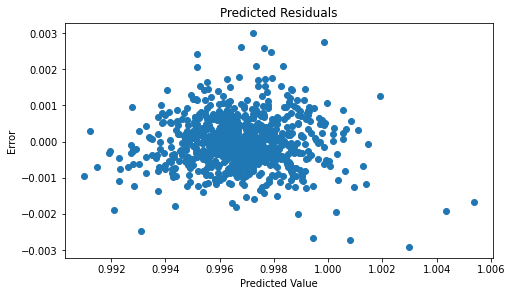

{'max_error': 0.0029894583266620867,
 'sum_squared_error': 0.0004139221230317719,
 'mean_squared_error': 5.148285112335471e-07,
 'root_mean_squared_error': 0.0007175155128870365,
 'mean_absolute_error': 0.0005447124592469335,
 'r2_score': 0.8526927027513329}

In [8]:
density_red_model = LinearRegression()
density_red_model.fit(density_red_x, density_red_y)
density_red_pred = density_red_model.predict(density_red_x)

helpers.eval.plot_residuals(density_red_y, density_red_pred)

helpers.eval.regression_metrics(density_red_y, density_red_pred)

This model seems to be performing wonderfully with a very small RMSE, but we might be able to get better results by adjusting the hyperparameters

## Feature engineering

C:\Users\Crux\AppData\Local\Temp\ipykernel_11724\1744659198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red['unexplained_density'] = red.density - density_red_pred


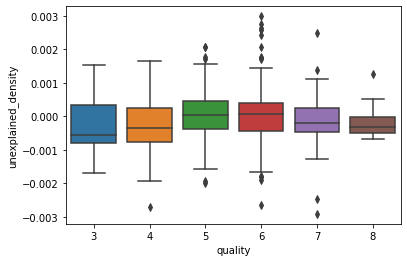

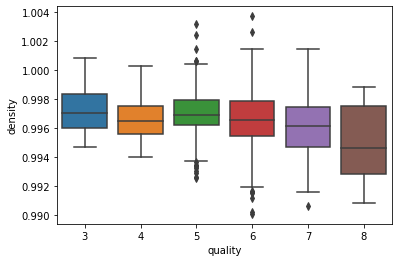

In [9]:
density_red_model = LinearRegression(fit_intercept=True)
density_red_model.fit(density_red_x, density_red_y)
density_red_pred = density_red_model.predict(density_red_x)

red['unexplained_density'] = red.density - density_red_pred

import seaborn as sns
sns.boxplot(data= red, x='quality', y='unexplained_density')
plt.show()
sns.boxplot(data= red, x='quality', y='density')
plt.show()

### White wines

In [10]:
white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
3936,6.5,0.28,0.35,9.8,0.067,61.0,180.0,0.99720,3.15,0.57,9.0,4,white
3914,7.7,0.42,0.38,8.1,0.061,49.0,144.0,0.99660,3.40,0.58,11.0,6,white
5272,5.4,0.30,0.30,1.2,0.029,25.0,93.0,0.98742,3.31,0.40,13.6,7,white
3687,8.7,0.15,0.30,1.6,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,6,white
3417,6.0,0.26,0.29,1.0,0.032,27.0,96.0,0.98960,3.38,0.44,12.3,6,white


In [11]:
density_white_y = white.density
density_white_x = white.drop(columns=drop_cols)
density_white_baseline_model = helpers.eval.BaselineModel(method='mean')
density_white_baseline_model.fit(density_white_x, density_white_y)
density_white_baseline_pred = density_white_baseline_model.predict(density_white_x)
helpers.eval.regression_metrics(density_white_y, density_white_baseline_pred)

{'max_error': 0.016514206448911106,
 'sum_squared_error': 0.019138188471220688,
 'mean_squared_error': 8.014316780243169e-06,
 'root_mean_squared_error': 0.0028309568665458628,
 'mean_absolute_error': 0.002338217104506346,
 'r2_score': 0.0}

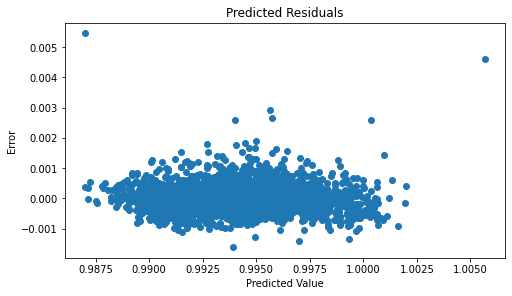

{'max_error': 0.005454844934945746,
 'sum_squared_error': 0.0005463143181387018,
 'mean_squared_error': 2.2877484009158367e-07,
 'root_mean_squared_error': 0.00047830412928552443,
 'mean_absolute_error': 0.000350167727974989,
 'r2_score': 0.9714542304272826}

In [12]:
density_white_model = LinearRegression(fit_intercept=True)
density_white_model.fit(density_white_x, density_white_y)
density_white_p = density_white_model.predict(density_white_x)

helpers.eval.plot_residuals(density_white_y, density_white_p)

helpers.eval.regression_metrics(density_white_y, density_white_p)

C:\Users\Crux\AppData\Local\Temp\ipykernel_11724\2524162337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white['unexplained_density'] = white.density - density_white_p


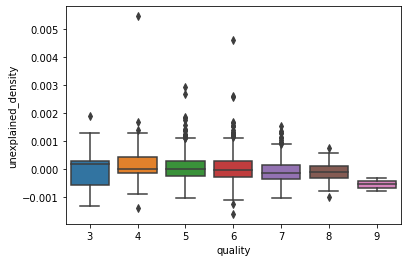

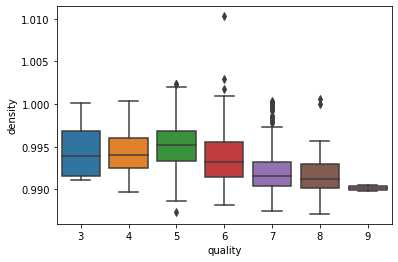

In [13]:
white['unexplained_density'] = white.density - density_white_p

import seaborn as sns
sns.boxplot(data= white, x='quality', y='unexplained_density')
plt.show()
sns.boxplot(data= white, x='quality', y='density')
plt.show()

# Takeaways

Although I had high hopes for this process, I don't beleive the results to be very predictive of quality.

In [15]:
density_white_model.feature_names_in_, density_white_model.coef_

(array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
        'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
        'total_sulfur_dioxide', 'ph', 'sulphates', 'alcohol'], dtype=object),
 array([ 7.68705724e-04,  3.84253737e-04,  2.59390001e-04,  3.54774859e-04,
         3.57224764e-03, -5.92024620e-06,  3.96585807e-06,  3.25269525e-03,
         1.33941579e-03, -1.16412340e-03]))